In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch_geometric.loader import DataLoader

from exploration.dataset import PyGAcademicGraph

from utils import set_all_seeds, train, evaluate, plot_MSE_scores

from exploitation.models import GAT, GCN, WeightedGCN


%load_ext autoreload
%autoreload 2

NUM_EXPERIMENTS = 5
set_all_seeds(seed=44)

## Original Graphs Without Weights

In [2]:
batch_size = 1

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="inductive")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="inductive")
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="inductive")
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 36936], y=[359], x=[359, 8], edge_attr=[36936, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 357, 358, 358],
        [  1,  89, 121,  ..., 352,  89, 358]])
Number of features per node:  8


### GCN Without Weights

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "GCN without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GCN(
        input_size=n_features,
        hidden_size=64,
        output_size=1,
        num_layers=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.002)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2392
MSE: 0.2197
Epoch 00002 | Loss: 0.2379
Epoch 00003 | Loss: 0.2394
Epoch 00004 | Loss: 0.2395
Epoch 00005 | Loss: 0.2395
Epoch 00006 | Loss: 0.2395
MSE: 0.2197
Epoch 00007 | Loss: 0.2395
Epoch 00008 | Loss: 0.2395
Epoch 00009 | Loss: 0.2396
Epoch 00010 | Loss: 0.2395
Epoch 00011 | Loss: 0.2395
MSE: 0.2197
Epoch 00012 | Loss: 0.2395
Epoch 00013 | Loss: 0.2395
Epoch 00014 | Loss: 0.2395
Epoch 00015 | Loss: 0.2395
Epoch 00016 | Loss: 0.2395
MSE: 0.2197
Epoch 00017 | Loss: 0.2395
Epoch 00018 | Loss: 0.2395
Epoch 00019 | Loss: 0.2395
Epoch 00020 | Loss: 0.2395
Epoch 00021 | Loss: 0.2395
MSE: 0.2197
Epoch 00022 | Loss: 0.2395
Epoch 00023 | Loss: 0.2394
Epoch 00024 | Loss: 0.2395
Epoch 00025 | Loss: 0.2387
Epoch 00026 | Loss: 0.2395
MSE: 0.2197
Epoch 00027 | Loss: 0.2395
Epoch 00028 | Loss: 0.2395
Epoch 00029 | Loss: 0.2395
Epoch 00030 | Loss: 0.2395
Epoch 00031 | Loss: 0.2397
MSE: 0.2197
Epoch 00032 | Loss: 0.2395
Epoch 00033 | Loss: 0.2395
Epoch 00034

MSE of GCN without weights-0 on the test set: 0.2097
MSE of GCN without weights-1 on the test set: 0.2360
MSE of GCN without weights-2 on the test set: 0.2461
MSE of GCN without weights-3 on the test set: 0.1640
MSE of GCN without weights-4 on the test set: 0.2490
OVERALL: MSE of GCN without weights on the test set: 0.2360


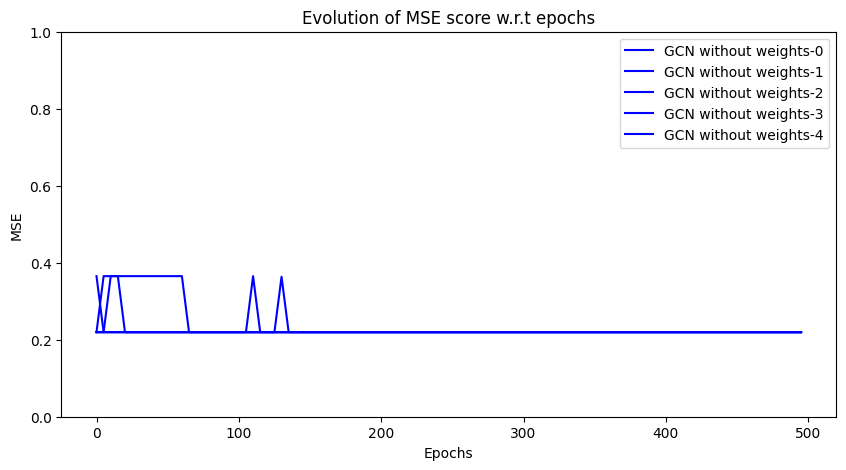

In [4]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

### GAT Without Weights

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "GAT without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GAT(
        input_size=n_features,
        hidden_size=32,
        output_size=1,
        num_layers=2,
        heads=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.005)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2742
MSE: 0.2197
Epoch 00002 | Loss: 0.2405
Epoch 00003 | Loss: 0.2384
Epoch 00004 | Loss: 0.2383
Epoch 00005 | Loss: 0.2403
Epoch 00006 | Loss: 0.2395
MSE: 0.2197
Epoch 00007 | Loss: 0.2395
Epoch 00008 | Loss: 0.2397
Epoch 00009 | Loss: 0.2396
Epoch 00010 | Loss: 0.2393
Epoch 00011 | Loss: 0.2395
MSE: 0.2197
Epoch 00012 | Loss: 0.2395
Epoch 00013 | Loss: 0.2392
Epoch 00014 | Loss: 0.2395
Epoch 00015 | Loss: 0.2395
Epoch 00016 | Loss: 0.2395
MSE: 0.2197
Epoch 00017 | Loss: 0.2396
Epoch 00018 | Loss: 0.2395
Epoch 00019 | Loss: 0.2395
Epoch 00020 | Loss: 0.2395
Epoch 00021 | Loss: 0.2400
MSE: 0.2197
Epoch 00022 | Loss: 0.2399
Epoch 00023 | Loss: 0.2395
Epoch 00024 | Loss: 0.2395
Epoch 00025 | Loss: 0.2397
Epoch 00026 | Loss: 0.2395
MSE: 0.2197
Epoch 00027 | Loss: 0.2395
Epoch 00028 | Loss: 0.2402
Epoch 00029 | Loss: 0.2395
Epoch 00030 | Loss: 0.2395
Epoch 00031 | Loss: 0.2391
MSE: 0.2197
Epoch 00032 | Loss: 0.2395
Epoch 00033 | Loss: 0.2398
Epoch 00034

MSE of GAT without weights-0 on the test set: 0.2490
MSE of GAT without weights-1 on the test set: 0.2489
MSE of GAT without weights-2 on the test set: 0.2490
MSE of GAT without weights-3 on the test set: 0.2490
MSE of GAT without weights-4 on the test set: 0.2490
OVERALL: MSE of GAT without weights on the test set: 0.2490


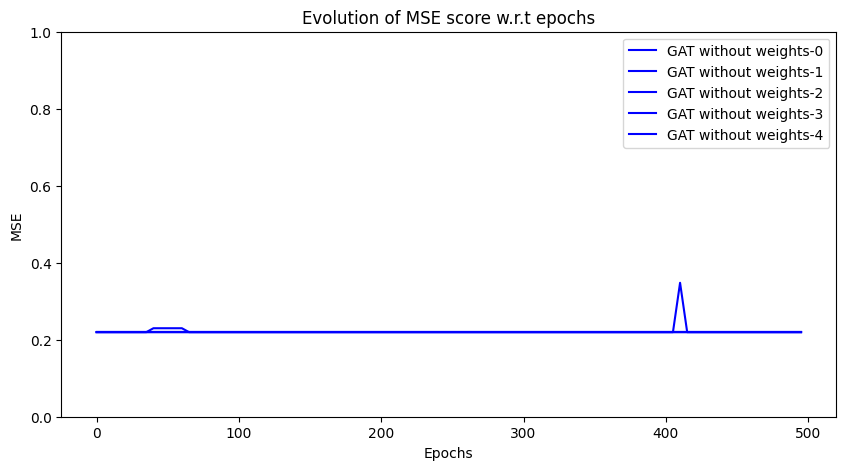

In [6]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

## Sparsified Graphs Without Weights

In [7]:
batch_size = 1
threshold = 30

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="inductive", sparsify_threshold=threshold)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="inductive", sparsify_threshold=threshold)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="inductive", sparsify_threshold=threshold)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 1281], y=[359], x=[359, 8], edge_attr=[1281, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 338, 350, 354],
        [ 89, 183,   0,  ..., 338, 350, 354]])
Number of features per node:  8


### Sparsified GCN Without Weights

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Sparsified GCN without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GCN(
        input_size=n_features,
        hidden_size=64,
        output_size=1,
        num_layers=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.002)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2883
MSE: 0.2197
Epoch 00002 | Loss: 0.2420
Epoch 00003 | Loss: 0.2316
Epoch 00004 | Loss: 0.1989
Epoch 00005 | Loss: 0.1514
Epoch 00006 | Loss: 0.1409
MSE: 0.2156
Epoch 00007 | Loss: 0.1422
Epoch 00008 | Loss: 0.1400
Epoch 00009 | Loss: 0.1387
Epoch 00010 | Loss: 0.1390
Epoch 00011 | Loss: 0.1400
MSE: 0.2189
Epoch 00012 | Loss: 0.1415
Epoch 00013 | Loss: 0.1395
Epoch 00014 | Loss: 0.1404
Epoch 00015 | Loss: 0.1396
Epoch 00016 | Loss: 0.1399
MSE: 0.2189
Epoch 00017 | Loss: 0.1385
Epoch 00018 | Loss: 0.1387
Epoch 00019 | Loss: 0.1404
Epoch 00020 | Loss: 0.1400
Epoch 00021 | Loss: 0.1386
MSE: 0.2181
Epoch 00022 | Loss: 0.1385
Epoch 00023 | Loss: 0.1426
Epoch 00024 | Loss: 0.1403
Epoch 00025 | Loss: 0.1401
Epoch 00026 | Loss: 0.1384
MSE: 0.2181
Epoch 00027 | Loss: 0.1406
Epoch 00028 | Loss: 0.1394
Epoch 00029 | Loss: 0.1390
Epoch 00030 | Loss: 0.1393
Epoch 00031 | Loss: 0.1387
MSE: 0.2183
Epoch 00032 | Loss: 0.1402
Epoch 00033 | Loss: 0.1389
Epoch 00034

MSE of Sparsified GCN without weights-0 on the test set: 0.0238
MSE of Sparsified GCN without weights-1 on the test set: 0.0218
MSE of Sparsified GCN without weights-2 on the test set: 0.0257
MSE of Sparsified GCN without weights-3 on the test set: 0.0214
MSE of Sparsified GCN without weights-4 on the test set: 0.0212
OVERALL: MSE of Sparsified GCN without weights on the test set: 0.0218


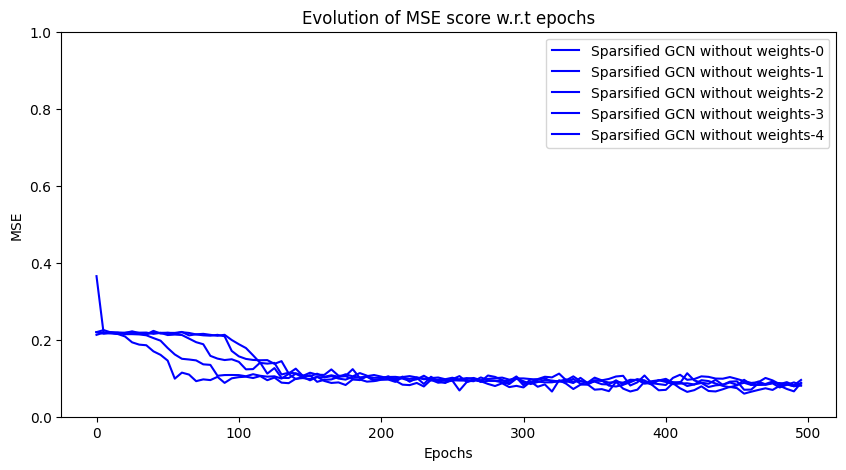

In [9]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

### Sparsified GAT Without Weights

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Sparsified GAT without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GAT(
        input_size=n_features,
        hidden_size=32,
        output_size=1,
        num_layers=2,
        heads=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.005)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.1843
MSE: 0.2084
Epoch 00002 | Loss: 0.1676
Epoch 00003 | Loss: 0.1498
Epoch 00004 | Loss: 0.1447
Epoch 00005 | Loss: 0.1434
Epoch 00006 | Loss: 0.1419
MSE: 0.1988
Epoch 00007 | Loss: 0.1437
Epoch 00008 | Loss: 0.1484
Epoch 00009 | Loss: 0.1476
Epoch 00010 | Loss: 0.1382
Epoch 00011 | Loss: 0.1408
MSE: 0.2153
Epoch 00012 | Loss: 0.1388
Epoch 00013 | Loss: 0.1337
Epoch 00014 | Loss: 0.1391
Epoch 00015 | Loss: 0.1364
Epoch 00016 | Loss: 0.1357
MSE: 0.2169
Epoch 00017 | Loss: 0.1370
Epoch 00018 | Loss: 0.1349
Epoch 00019 | Loss: 0.1342
Epoch 00020 | Loss: 0.1354
Epoch 00021 | Loss: 0.1360
MSE: 0.2081
Epoch 00022 | Loss: 0.1344
Epoch 00023 | Loss: 0.1366
Epoch 00024 | Loss: 0.1394
Epoch 00025 | Loss: 0.1366
Epoch 00026 | Loss: 0.1371
MSE: 0.1614
Epoch 00027 | Loss: 0.1372
Epoch 00028 | Loss: 0.1352
Epoch 00029 | Loss: 0.1336
Epoch 00030 | Loss: 0.1313
Epoch 00031 | Loss: 0.1358
MSE: 0.1704
Epoch 00032 | Loss: 0.1351
Epoch 00033 | Loss: 0.1316
Epoch 00034

MSE of Sparsified GAT without weights-0 on the test set: 0.0223
MSE of Sparsified GAT without weights-1 on the test set: 0.0223
MSE of Sparsified GAT without weights-2 on the test set: 0.0234
MSE of Sparsified GAT without weights-3 on the test set: 0.0202
MSE of Sparsified GAT without weights-4 on the test set: 0.0207
OVERALL: MSE of Sparsified GAT without weights on the test set: 0.0223


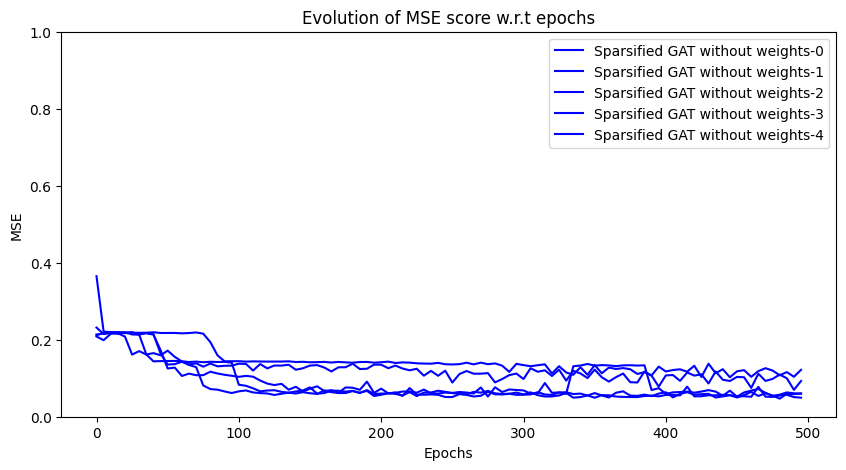

In [11]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

## Original Graphs With Weights

In [12]:
batch_size = 1

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="inductive")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="inductive")
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="inductive")
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 36936], y=[359], x=[359, 8], edge_attr=[36936, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 357, 358, 358],
        [  1,  89, 121,  ..., 352,  89, 358]])
Number of features per node:  8


### GCN With Weights

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "GCN with weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = WeightedGCN(
        input_size=n_features,
        hidden_size=64,
        output_size=1,
        num_layers=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.001)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2395
MSE: 0.2197
Epoch 00002 | Loss: 0.2395
Epoch 00003 | Loss: 0.2395
Epoch 00004 | Loss: 0.2395
Epoch 00005 | Loss: 0.2395
Epoch 00006 | Loss: 0.2395
MSE: 0.2197
Epoch 00007 | Loss: 0.2395
Epoch 00008 | Loss: 0.2395
Epoch 00009 | Loss: 0.2395
Epoch 00010 | Loss: 0.2395
Epoch 00011 | Loss: 0.2395
MSE: 0.2197
Epoch 00012 | Loss: 0.2395
Epoch 00013 | Loss: 0.2395
Epoch 00014 | Loss: 0.2395
Epoch 00015 | Loss: 0.2395
Epoch 00016 | Loss: 0.2395
MSE: 0.2197
Epoch 00017 | Loss: 0.2395
Epoch 00018 | Loss: 0.2395
Epoch 00019 | Loss: 0.2395
Epoch 00020 | Loss: 0.2395
Epoch 00021 | Loss: 0.2395
MSE: 0.2197
Epoch 00022 | Loss: 0.2395
Epoch 00023 | Loss: 0.2395
Epoch 00024 | Loss: 0.2395
Epoch 00025 | Loss: 0.2395
Epoch 00026 | Loss: 0.2395
MSE: 0.2197
Epoch 00027 | Loss: 0.2395
Epoch 00028 | Loss: 0.2395
Epoch 00029 | Loss: 0.2395
Epoch 00030 | Loss: 0.2395
Epoch 00031 | Loss: 0.2395
MSE: 0.2197
Epoch 00032 | Loss: 0.2395
Epoch 00033 | Loss: 0.2395
Epoch 00034

MSE of GCN with weights-0 on the test set: 0.2490
MSE of GCN with weights-1 on the test set: 0.0107
MSE of GCN with weights-2 on the test set: 0.0106
MSE of GCN with weights-3 on the test set: 0.0122
MSE of GCN with weights-4 on the test set: 0.0132
OVERALL: MSE of GCN with weights on the test set: 0.0122


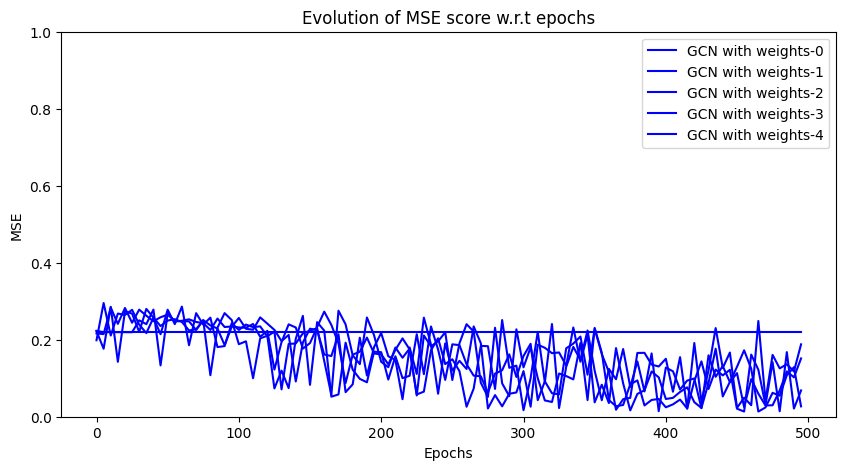

In [14]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)